<a href="https://colab.research.google.com/github/Luck1e23/STA160-Team-11-Project/blob/main/STA160_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import Adam

# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

file_path = '/content/drive/Shareddrives/STA_160/dataset/Data_Entry_2017.csv'
df = pd.read_csv(file_path)

# You can now work with your DataFrame (df)
print(df.head)

<bound method NDFrame.head of              Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Posit

In [ ]:
torchvision.datasets.MNIST("./",download=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 57.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.71MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.95MB/s]


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [ ]:
! ls /content/drive/Shareddrives/STA_160/dataset/images_001/images

00000001_000.png  00000318_008.png  00000643_008.png  00001022_001.png
00000001_001.png  00000318_009.png  00000644_000.png  00001022_002.png
00000001_002.png  00000318_010.png  00000644_001.png  00001023_000.png
00000002_000.png  00000319_000.png  00000645_000.png  00001023_001.png
00000003_000.png  00000320_000.png  00000645_001.png  00001023_002.png
00000003_001.png  00000321_000.png  00000646_000.png  00001023_003.png
00000003_002.png  00000321_001.png  00000646_001.png  00001024_000.png
00000003_003.png  00000321_002.png  00000646_002.png  00001025_000.png
00000003_004.png  00000321_003.png  00000646_003.png  00001026_000.png
00000003_005.png  00000321_004.png  00000646_004.png  00001027_000.png
00000003_006.png  00000321_005.png  00000646_005.png  00001027_001.png
00000003_007.png  00000322_000.png  00000646_006.png  00001028_000.png
00000004_000.png  00000322_001.png  00000646_007.png  00001028_001.png
00000005_000.png  00000322_002.png  00000647_000.png  00001029_000.png
000000

In [ ]:
from PIL import Image
x= Image.open("/content/drive/Shareddrives/STA_160/dataset/images_001/images/00001045_004.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/STA_160/dataset/images_001/images/00001045_004.png'

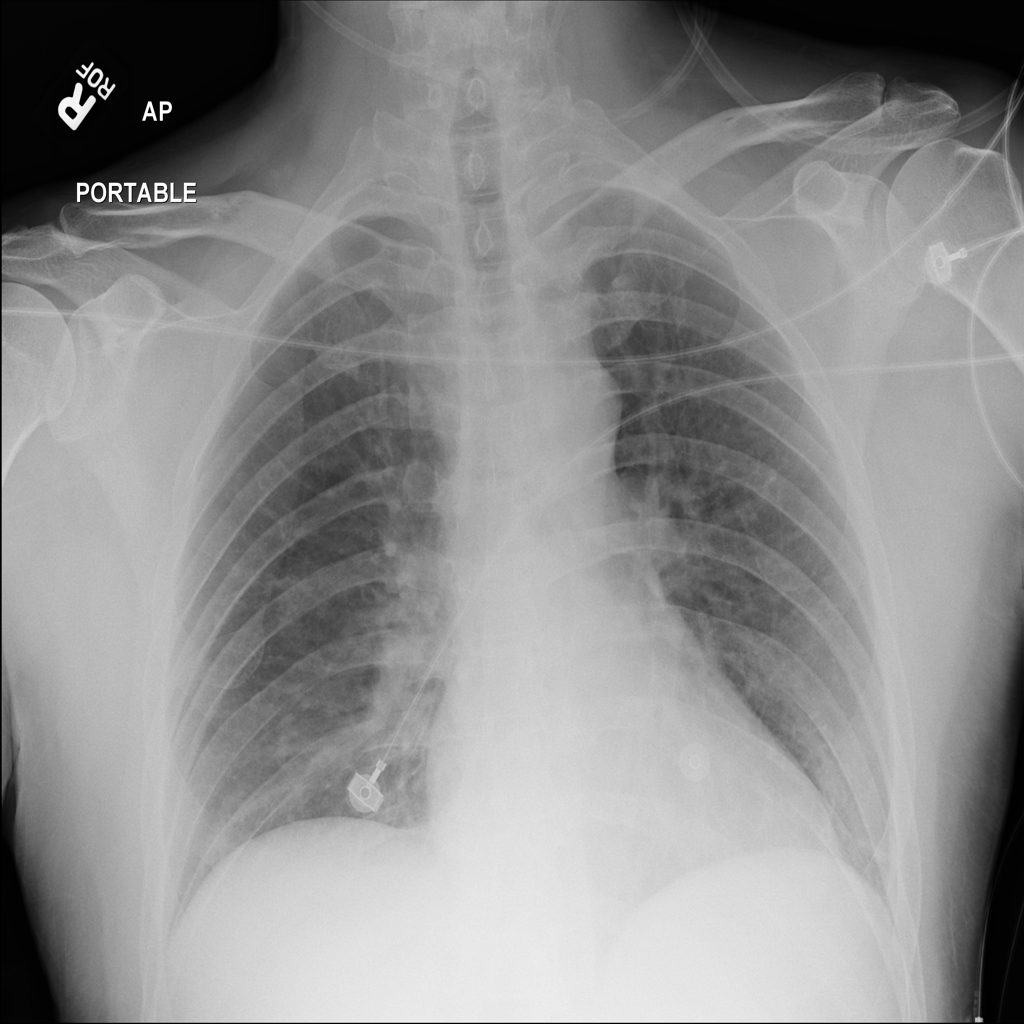

In [ ]:

np.array(x.convert("L")).shape
x

In [ ]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    abc.ABC(builtins.object)
        ImagePointHandler
        ImageTransformHandler
    builtins.Exception(bu

In [ ]:
from PIL import Image
import numpy as np
import os

# Pick one filename directly from your CSV
image_name = df.loc[0, '00000001_000.png']   # e.g., '00000001_000.png'

# Define the path to that image
image_path = os.path.join('/content/drive/Shareddrives/STA_160/dataset/images_001/images/00000001_000.png', image_name)

# Load image and convert to grayscale
img = Image.open(image_path).convert('L')

# Convert to NumPy array (this is the pixel matrix)
pixel_data = np.array(img)

# Print pixel values
print("Shape:", pixel_data.shape)       # e.g., (1024, 1024)
print(pixel_data)


KeyError: '00000001_000.png'

In [ ]:
# Create the Dataset class, NIHXrays, which contains the normalized pixel values of all the images

class NIHXrays(Dataset):
    def __init__(self, file_path, dataset_root, transform = None, list_file = None):
        self.data = pd.read_csv(file_path)
        self.dataset_root = dataset_root
        self.transform = transform

        if list_file:
            # Open the file and convert into a list of image names
            with open(list_file, 'r') as f:
                image_list = [line.strip() for line in f.readlines()]
            # Keep only rows that match the listed image names
            self.data = self.data[self.data['Image Index'].isin(image_list)].reset_index(drop = True)

        # Label map
        all_labels = set()
        for labels in self.data['Finding Labels']:
            for l in labels.split('|'):
                all_labels.add(l.strip())
        self.all_labels = sorted(list(all_labels))
        self.label_map = {label: idx for idx, label in enumerate(self.all_labels)}

        self.finding_labels = []
        for labels in self.data['Finding Labels']:
            vec = torch.zeros(len(self.all_labels))
            # Obtaining all the unique disease names
            for l in labels.split('|'):
                l = l.strip()
                if l in self.label_map:
                    vec[self.label_map[l]] = 1.0 # Mark as 1 if that is the disease found
            self.finding_labels.append(vec)

        # Image map
        self.image_map = {}
        # Go through all subfolders
        for root, dirs, files in os.walk(dataset_root):
            # Only keep 'images' folders
            if os.path.basename(root) == "images":
                for f in files:
                    self.image_map[f] = os.path.join(root, f)

    def __len__(self):
        # Get total number of samples
        return len(self.data)

    def __getitem__(self, idx):

        row = self.data.iloc[idx]
        img_name = row['Image Index']
        finding_label = self.finding_labels[idx]

        # Load and transform the image
        path = self.image_map.get(img_name)
        if not path:
            raise FileNotFoundError(f"Image {img_name} not found in dataset root.")
        img = Image.open(path).convert('L')  # Opens image and converts to grayscale
        if self.transform:
            img = self.transform(img)

        return img, finding_label, img_name

file_path = '/content/drive/Shareddrives/STA_160/dataset/Data_Entry_2017.csv'
dataset_root = '/content/drive/Shareddrives/STA_160/dataset'
train_val = '/content/drive/Shareddrives/STA_160/dataset/train_val_list.txt'
test = '/content/drive/Shareddrives/STA_160/dataset/test_list.txt'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor() # Converts image to tensor and normalizes pixel values
])

train_val_data = NIHXrays(file_path, dataset_root, transform = transform, list_file = train_val)
test_data = NIHXrays(file_path, dataset_root, transform = transform, list_file = test)

/usr/local/lib/python3.12/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
# Split the train_val_data into training and validation datasets
train_data, valid_data = torch.utils.data.random_split(train_val_data, [0.8, 0.2])

# Create DataLoaders for training and validation
n = 32
train_loader = DataLoader(train_data, batch_size=n, shuffle=True)
train_N = len(train_loader.dataset)
valid_loader = DataLoader(valid_data, batch_size=n)
valid_N = len(valid_loader.dataset)